In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv('../data_regression.csv')
mydata.head()

,TM,CA_TOT,SS_DAY
0,20150101,3.4,7.8
1,20150102,3.1,7.1
2,20150103,3.7,5.8
3,20150104,3.1,6.2
4,20150105,6.5,5.1


In [3]:
mydata.loc[mydata['SS_DAY'] == -9]

,TM,CA_TOT,SS_DAY
139,20150520,0.5,-9.0


In [4]:
mydata.loc[(mydata['SS_DAY'] == -9) & (mydata['CA_TOT'] == 0.5)]

,TM,CA_TOT,SS_DAY
139,20150520,0.5,-9.0


In [5]:
mydata.loc[mydata['SS_DAY'] == -9, 'SS_DAY'] = 10.7

In [6]:
# 단순선형회귀 모델링
result = sm.ols(formula='SS_DAY ~ CA_TOT', data=mydata).fit()

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SS_DAY   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     749.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.88e-90
Time:                        18:51:20   Log-Likelihood:                -827.45
No. Observations:                 365   AIC:                             1659.
Df Residuals:                     363   BIC:                             1667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2217      0.238     51.347      0.000      11.754      12.690
CA_TOT        -1.0953      0.040    -27.369      0.000      -1.174      -1.017
==============================================================================
Omnibus:                       16.488   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.529
Skew:                           0.482   Prob(JB):                     0.000258
Kurtosis:                       2.605   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# 회귀계수 출력
result.params
# => 회귀모형의 절편과 기울기 제시

Intercept    12.221711
CA_TOT       -1.095343
dtype: float64

In [9]:
# 회귀계수에 대한 P-value 출력
result.pvalues
# => 각 모수(절편, 기울기)의 통계적 유의확률 제시
# 일반적으로 0.05이하일 경우, 모수가 유의미한 것으로 해석

Intercept    1.545615e-168
CA_TOT        2.877431e-90
dtype: float64

In [10]:
# 조정된 R-squared 출력
result.rsquared_adj
# => 회귀모형의 결정계수가 제시
# 결정계수: 모형의 설명력 --> 67.27%

0.6726741174360685

In [11]:
# 모형의 적합도 출력
result.f_pvalue
# => 모형의 F검정의 유의확률 제시
# 유의확률이 0.05이하일 경우, 모형이 유의미한 것으로 해석

2.8774305545340323e-90

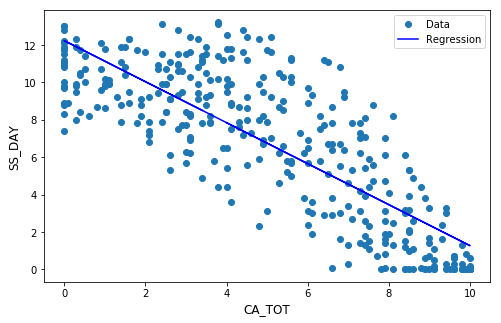

In [12]:
# graph
fig, ax = plt.subplots(figsize=(8,5))
plt.ylabel('SS_DAY', size=12)
plt.xlabel('CA_TOT', size=12)
ax.plot(mydata.CA_TOT.values, mydata.SS_DAY.values,'o',label='Data')
ax.plot(mydata.CA_TOT.values, result.fittedvalues,'b-',label='Regression')
ax.legend(loc='best')